In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import time
from sklearn.utils import resample
import seaborn as sns

%matplotlib inline

In [2]:
full_df = pd.read_csv('Breast Cancer Diagnosis/breast-cancer-wisconsin.data', 
                      names=['id','clumpthickness','cellsize','cellshape','adhesion','epithelialsize',
                             'barenuclei','chromatin','nucleoli','mitosis','class']
                     ) 
full_df['class'] = full_df['class'].replace({2:0, 4:1})
full_df['barenuclei'] = pd.to_numeric(full_df['barenuclei'], errors='coerce')
full_df = full_df.dropna()
full_df.shape

(683, 11)

In [3]:
neg_df = full_df[full_df['class']==0]
pos_df = full_df[full_df['class']==1]
print(len(neg_df), len(pos_df))

pos_df_upsampled = resample(pos_df, n_samples=444)
print(pos_df_upsampled.shape)

full_df = pd.concat([pos_df_upsampled, neg_df])

444 239
(444, 11)


In [4]:
X = full_df.loc[:, 'clumpthickness':'mitosis']
Y = full_df.loc[:, 'class']

Before we start modeling, let's take a look at the dataset. Then we'll create a decision tree, see how accurate we can make it, then measure its runtime.

In [5]:
corrmat = full_df.corr()

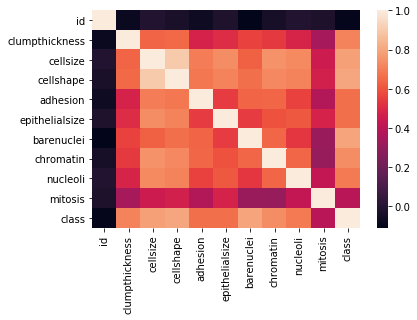

In [6]:
sns.heatmap(corrmat)

Class is fairly highly correlated with a number of the variables -- this means we should have a good chance of being able to predict it. Hopefully those correlations aren't so high as to be problematic later on. 

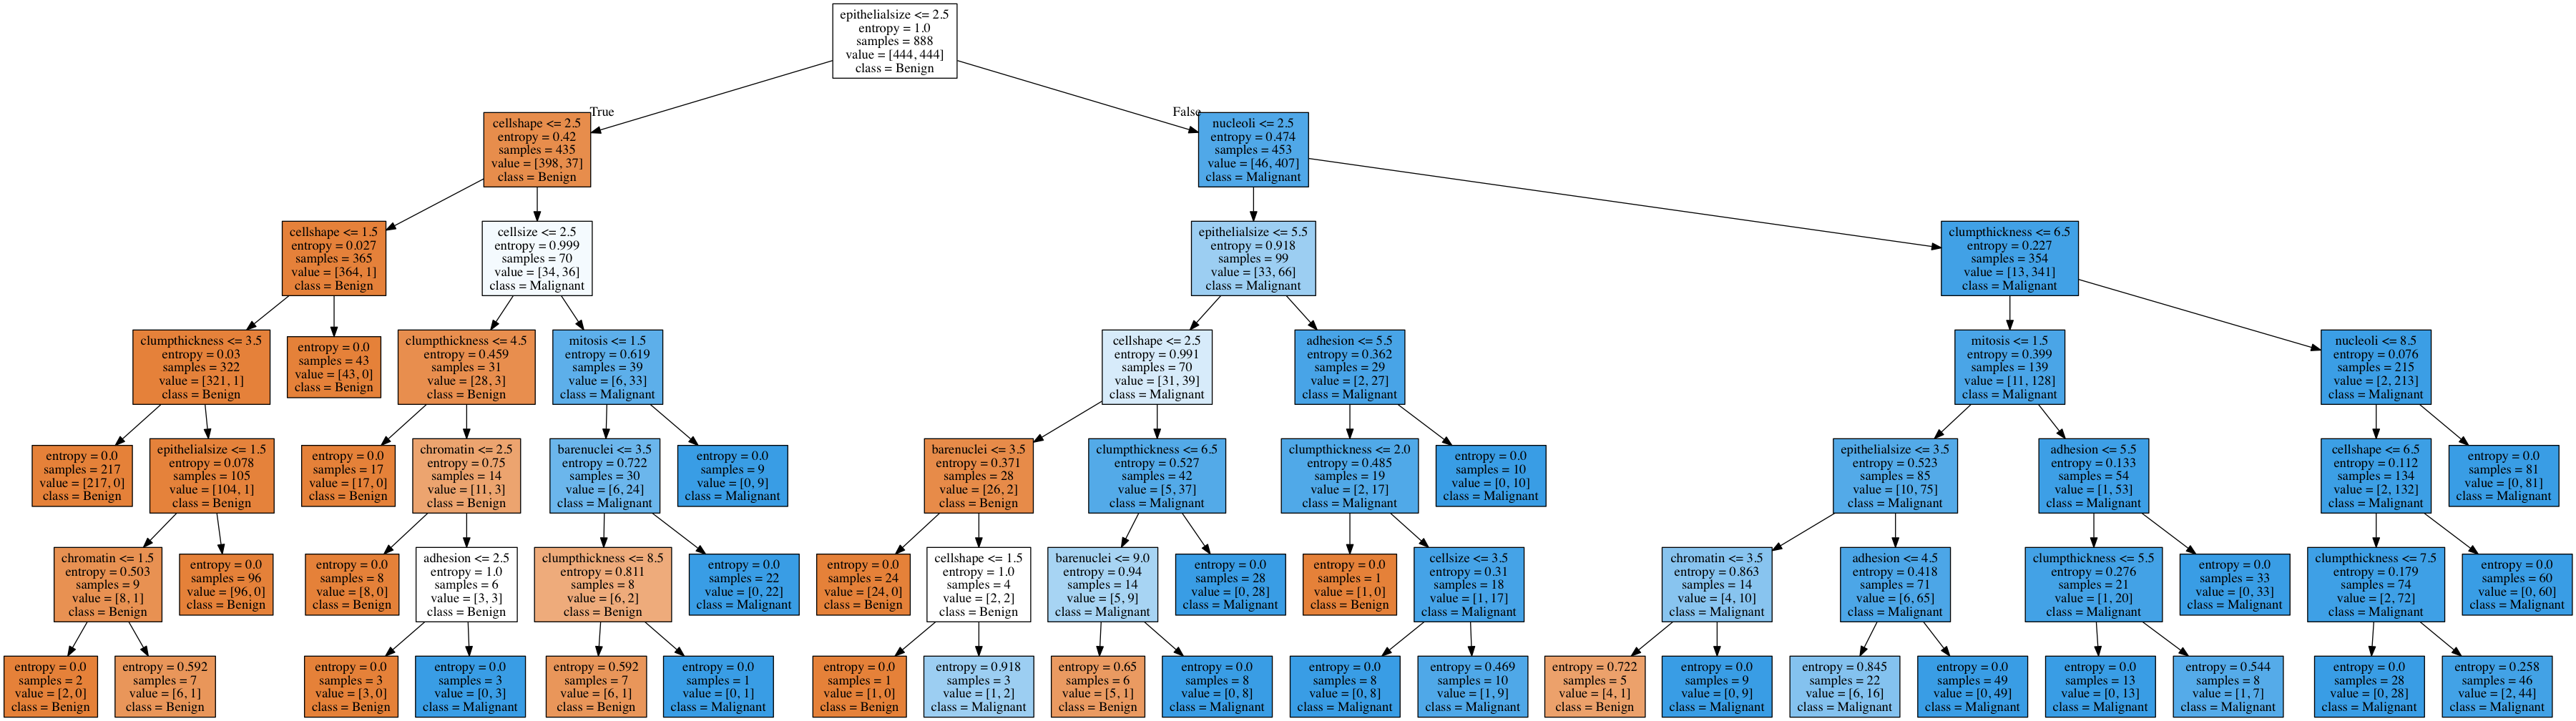

In [7]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=6
)
decision_tree.fit(X, Y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Benign', 'Malignant'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [8]:
start_time = time.time()
dt_score = cross_val_score(decision_tree, X, Y, cv=5)
print(dt_score)
print('Accuracy: %.2f +/- %.2f' % (dt_score.mean(), 2*dt_score.std()))
print("--- %s seconds ---" % (time.time() - start_time))

[ 0.96067416  0.95505618  0.96067416  0.98314607  0.99431818]
Accuracy: 0.97 +/- 0.03
--- 0.01736593246459961 seconds ---


Let's start with the default RFC -- we can modify it in later runs.

In [9]:
rfc = ensemble.RandomForestClassifier()
start_time = time.time()
rfc_score = cross_val_score(rfc, X, Y, cv=5)
print(rfc_score)
print('Accuracy: %.2f +/- %.2f' % (rfc_score.mean(), 2*rfc_score.std()))
print("--- %s seconds ---" % (time.time() - start_time))

[ 0.98314607  0.96067416  0.96067416  0.98876404  0.99431818]
Accuracy: 0.98 +/- 0.03
--- 0.10391402244567871 seconds ---


Random Forest does a tiny bit better, and takes 4-6 times longer, depending on the run. And this is for a tiny data set! 10 columns and 680 data points. 

In [10]:
from sklearn.feature_selection import RFE

In [11]:
rfe = RFE(rfc, 5)
rfe.fit(X, Y)
rfe.ranking_

array([1, 1, 1, 4, 1, 1, 3, 2, 5])

In [12]:
X_rfe = X.loc[:, rfe.support_]

In [13]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=7
)

dt_score = cross_val_score(decision_tree, X_rfe, Y, cv=5)
print('Accuracy: %.2f +/- %.2f' % (dt_score.mean(), 2*dt_score.std()))

dt_score = cross_val_score(decision_tree, X_rfe, Y, cv=5)
print('Accuracy: %.2f +/- %.2f' % (dt_score.mean(), 2*dt_score.std()))

dt_score = cross_val_score(decision_tree, X_rfe, Y, cv=5)
print('Accuracy: %.2f +/- %.2f' % (dt_score.mean(), 2*dt_score.std()))

Accuracy: 0.97 +/- 0.03
Accuracy: 0.96 +/- 0.04
Accuracy: 0.97 +/- 0.03


In [14]:
rfc = ensemble.RandomForestClassifier(
    n_estimators=50,
    max_depth=7
)

rfc_score = cross_val_score(rfc, X_rfe, Y, cv=5)
print('Accuracy: %.2f +/- %.2f' % (rfc_score.mean(), 2*rfc_score.std()))

rfc_score = cross_val_score(rfc, X_rfe, Y, cv=5)
print('Accuracy: %.2f +/- %.2f' % (rfc_score.mean(), 2*rfc_score.std()))

rfc_score = cross_val_score(rfc, X_rfe, Y, cv=5)
print('Accuracy: %.2f +/- %.2f' % (rfc_score.mean(), 2*rfc_score.std()))

Accuracy: 0.98 +/- 0.02
Accuracy: 0.98 +/- 0.02
Accuracy: 0.98 +/- 0.02


In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=3)
pca.fit(X)
print(pca.explained_variance_ratio_)

[ 0.66934938  0.08401977  0.06095451]


In [17]:
pca.components_.shape

(3, 9)

In [18]:
X.shape

(888, 9)

In [19]:
X_pca = np.matmul(X, pca.components_.T)

In [20]:
X_pca.shape

(888, 3)

In [21]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=7
)

dt_score = cross_val_score(decision_tree, X_pca, Y, cv=5)
print('Accuracy: %.2f +/- %.2f' % (dt_score.mean(), 2*dt_score.std()))

dt_score = cross_val_score(decision_tree, X_pca, Y, cv=5)
print('Accuracy: %.2f +/- %.2f' % (dt_score.mean(), 2*dt_score.std()))

dt_score = cross_val_score(decision_tree, X_pca, Y, cv=5)
print('Accuracy: %.2f +/- %.2f' % (dt_score.mean(), 2*dt_score.std()))

Accuracy: 0.94 +/- 0.11
Accuracy: 0.97 +/- 0.04
Accuracy: 0.98 +/- 0.02


In [22]:
rfc = ensemble.RandomForestClassifier(
    n_estimators=50,
    max_depth=7
)

rfc_score = cross_val_score(rfc, X_pca, Y, cv=5)
print('Accuracy: %.2f +/- %.2f' % (rfc_score.mean(), 2*rfc_score.std()))

rfc_score = cross_val_score(rfc, X_pca, Y, cv=5)
print('Accuracy: %.2f +/- %.2f' % (rfc_score.mean(), 2*rfc_score.std()))

rfc_score = cross_val_score(rfc, X_pca, Y, cv=5)
print('Accuracy: %.2f +/- %.2f' % (rfc_score.mean(), 2*rfc_score.std()))

Accuracy: 0.98 +/- 0.03
Accuracy: 0.98 +/- 0.03
Accuracy: 0.98 +/- 0.03


In [23]:
rfc.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
confusion_matrix(Y, rfc.predict(X))

array([[437,   7],
       [  0, 444]])

Not bad! Our RFC is doing quite well. It would be interesting to dig into the incorrect cases and see if there's some pattern it what we're missing here.